# CNN architecture for spectral analysis defined by Tegegn et al.

Source:   
Paper: Convolutional Neural Networks for Quantitative Prediction of Different Organic Materials using Near-Infrared Spectrum by Dagmawi Delelegn Tegegn, Italo Francesco Zoppis, Sara Manzoni, Cezar Sas and Edoardo Lotti

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, explained_variance_score

import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
dps1200 = pd.read_csv("dps1200.csv")

In [3]:
# splitting the dataset in features und lables

features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [5]:
print("Form von train_data:", train_data.shape)
print("Form von train_data:", test_data.shape)

Form von train_data: (1032, 410)
Form von train_data: (258, 410)


In [6]:
model = Sequential()
model.add(Conv1D(32, kernel_size=2, activation='relu', use_bias=False, input_shape=(410, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=2, activation='relu', use_bias=False))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(64, kernel_size=2, activation='relu', use_bias=False))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=2, activation='relu', use_bias=False))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.004), loss=tf.keras.losses.Huber(), metrics=['mae'])
history = model.fit(train_data, train_labels, epochs=1000, verbose = True, validation_split=0.2)
model.summary()
print(model.evaluate(test_data, test_labels, verbose=False))

d:\programming\python\first_steps_with_cnns\tensor\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1727.6484 - mae: 1728.5023 - val_loss: 912.2054 - val_mae: 910.3828
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 458.9399 - mae: 459.5017 - val_loss: 189.5354 - val_mae: 191.3396
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 196.8546 - mae: 197.3345 - val_loss: 199.5867 - val_mae: 201.0641
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 206.4132 - mae: 206.9564 - val_loss: 195.4241 - val_mae: 197.0700
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 204.7446 - mae: 205.2757 - val_loss: 167.5616 - val_mae: 170.3069
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 191.8618 - mae: 192.3680 - val_loss: 168.8174 - val_mae: 171.4584
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 192.6089 - mae: 193.1086 - val_loss: 172.9826 - val_mae: 175.1203
Epoch 8/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 189.0265 - mae: 189.5167 - val_loss: 200.5018 - val_mae

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 409, 32)        │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 204, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 203, 32)        │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 49, 64)         │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 23, 64)         │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537,797 (2.05 MB)

 Trainable params: 179,265 (700.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 358,532 (1.37 MB)

[97.29314422607422, 78.089599609375]


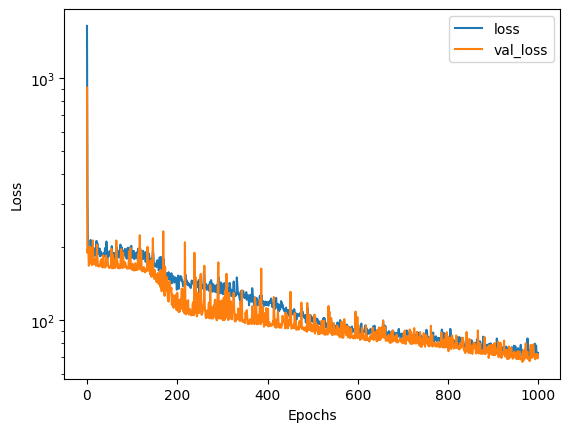

In [7]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [8]:
predicted = model.predict(train_data)
predicted_test = model.predict(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [9]:
## Compute error metrics
def error_metrices(y_true_train, y_predicted_train, y_true_test, y_predicted_test):
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_predicted_train))
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_predicted_test))
    R2_train= r2_score(y_true_train, y_predicted_train)
    R2_test= r2_score(y_true_test, y_predicted_test)

    print('\n\n*********** Benchmark results ***********\n')
    print(f"R2    (Train/Test) = {R2_train:.3f} / {R2_test:.3f}")
    print(f"RMSE  (Train/Test) = {rmse_train:.3f} / {rmse_test:.3f}")

error_metrices(train_labels, predicted, test_labels, predicted_test)



*********** Benchmark results ***********

R2    (Train/Test) = 0.728 / 0.683
RMSE  (Train/Test) = 101.767 / 113.086


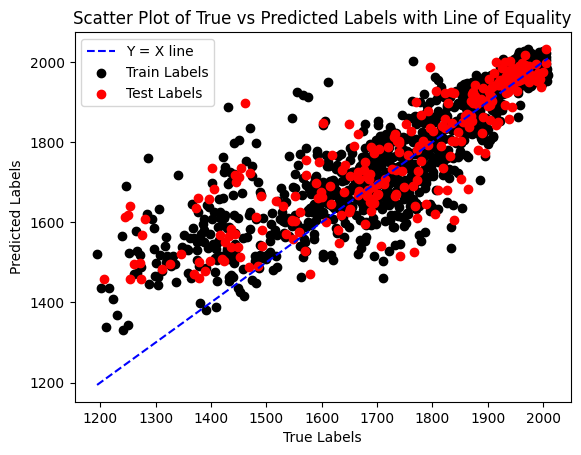

In [10]:
x_values = np.linspace(min(labels), max(labels), 100)

# Plot the line of equality (y=x)
plt.plot(x_values, x_values, color='blue', linestyle='--', label='Y = X line')

# Scatter plot for predicted values
plt.scatter(train_labels, predicted[:, 0], c='k', label='Train Labels')
plt.scatter(test_labels, predicted_test[:, 0], c='r', label='Test Labels')

# Labels, legend, and title
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.title('Scatter Plot of True vs Predicted Labels with Line of Equality')

# Show the plot
plt.show()